In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
df = pd.read_excel("premiums_rest.xlsx")
df

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,60,Female,Northwest,Married,3,Normal,No Smoking,Self-Employed,25L - 40L,26,High blood pressure,Gold,26370
29900,40,Female,Southeast,Unmarried,0,Overweight,Regular,Salaried,10L - 25L,16,Diabetes & Thyroid,Gold,29496
29901,37,Female,Northwest,Unmarried,0,Obesity,No Smoking,Salaried,<10L,4,No Disease,Bronze,10957
29902,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076


In [3]:
df['Genetical_Risk']=0

In [4]:
df.shape

(29904, 14)

In [5]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount', 'Genetical_Risk'],
      dtype='object')

In [6]:
df.columns = df.columns.str.replace(' ',"_").str.lower()
df

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,60,Female,Northwest,Married,3,Normal,No Smoking,Self-Employed,25L - 40L,26,High blood pressure,Gold,26370,0
29900,40,Female,Southeast,Unmarried,0,Overweight,Regular,Salaried,10L - 25L,16,Diabetes & Thyroid,Gold,29496,0
29901,37,Female,Northwest,Unmarried,0,Obesity,No Smoking,Salaried,<10L,4,No Disease,Bronze,10957,0
29902,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076,0


### Handling Null Values

In [7]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [8]:
df.dropna(inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [9]:
df

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,60,Female,Northwest,Married,3,Normal,No Smoking,Self-Employed,25L - 40L,26,High blood pressure,Gold,26370,0
29900,40,Female,Southeast,Unmarried,0,Overweight,Regular,Salaried,10L - 25L,16,Diabetes & Thyroid,Gold,29496,0
29901,37,Female,Northwest,Unmarried,0,Obesity,No Smoking,Salaried,<10L,4,No Disease,Bronze,10957,0
29902,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076,0


### Handling Duplicates

In [10]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
df.shape

(29886, 14)

### Check statistics of the Data

In [12]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.379910,23.364184,20892.303821,0.0
std,13.412657,1.431201,24.740339,6936.813440,0.0
min,26.000000,-3.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


In [13]:
df[df.number_of_dependants<0].shape

(50, 14)

In [14]:
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-1, -3], dtype=int64)

In [15]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    29886.000000
mean         2.385933
std          1.421137
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

### Outliers detection

Fetching Numeric Columns

In [16]:
numeric_columns=df.select_dtypes(['float64','int64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

We will fetch ouliers with the help of box plot . What we will do is inially we will plot outliers for all numeric cols.

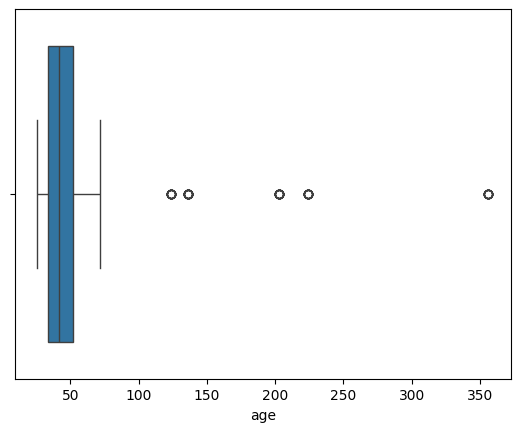

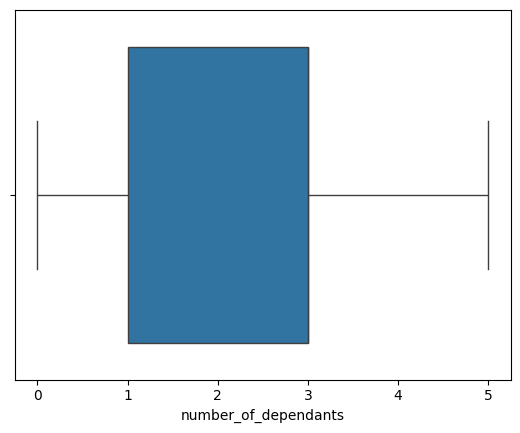

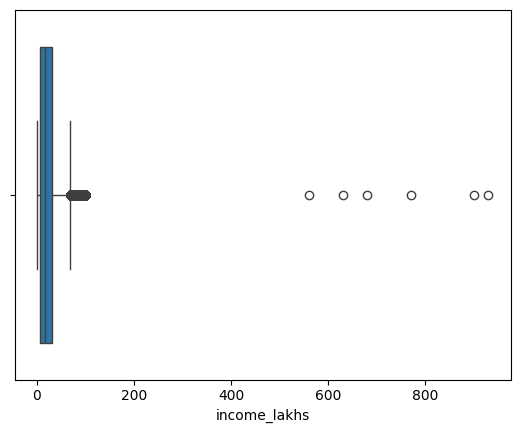

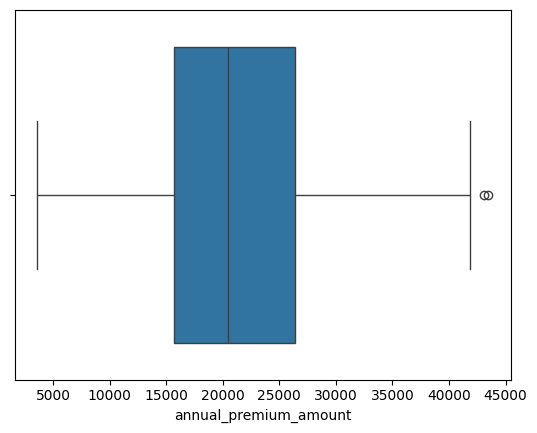

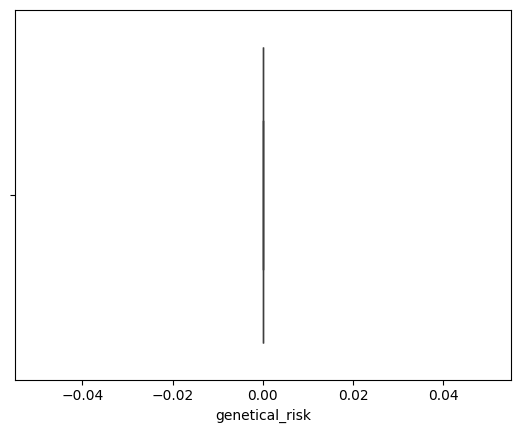

In [17]:
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [18]:
df[df.age>100]['age'].unique()

array([224, 124, 136, 203, 356], dtype=int64)

In [19]:
df1=df[df.age<=100].copy()

In [20]:
df1

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,60,Female,Northwest,Married,3,Normal,No Smoking,Self-Employed,25L - 40L,26,High blood pressure,Gold,26370,0
29900,40,Female,Southeast,Unmarried,0,Overweight,Regular,Salaried,10L - 25L,16,Diabetes & Thyroid,Gold,29496,0
29901,37,Female,Northwest,Unmarried,0,Obesity,No Smoking,Salaried,<10L,4,No Disease,Bronze,10957,0
29902,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076,0


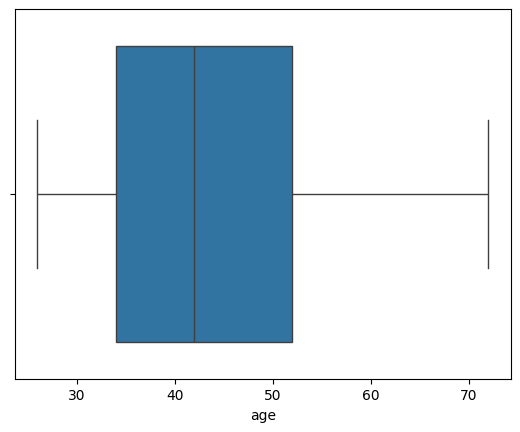

In [21]:
sns.boxplot(x=df1['age'])
plt.show()

In [22]:
def get_iqr_bounds(col):
    Q1,Q3 =col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_bounds=Q1-1.5*IQR
    upper_bounds=Q3+1.5*IQR
    return lower_bounds , upper_bounds

In [23]:
get_iqr_bounds(df.income_lakhs)

(-30.5, 69.5)

In [24]:
quantile_threshold = df.income_lakhs.quantile(0.90)
quantile_threshold

56.0

In [25]:
quantile_threshold = df.income_lakhs.quantile(0.95)
quantile_threshold

78.0

In [26]:
quantile_threshold = df.income_lakhs.quantile(0.999)
quantile_threshold

100.0

In [27]:
df1[df1.income_lakhs>quantile_threshold].shape

(6, 14)

Dropping those values whose income is >100 lakhs

In [28]:
df2=df1[df1.income_lakhs<=quantile_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.0
mean,43.094896,2.387734,23.226343,20900.689223,0.0
std,11.042430,1.420644,22.455408,6928.192115,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15705.250000,0.0
50%,42.000000,3.000000,17.000000,20495.500000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,72.000000,5.000000,100.000000,43471.000000,0.0


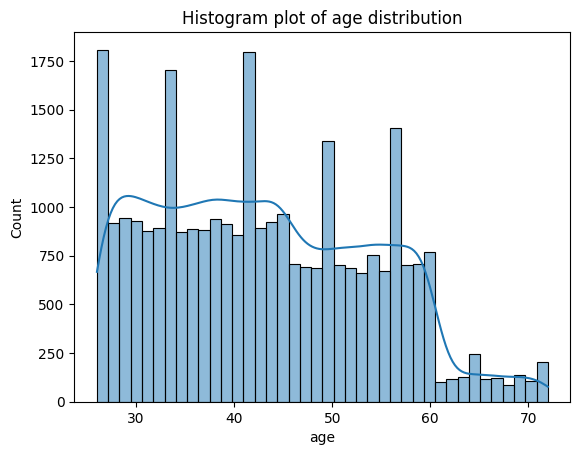

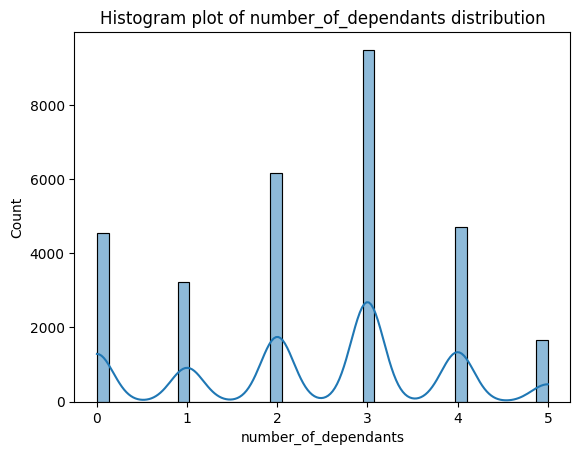

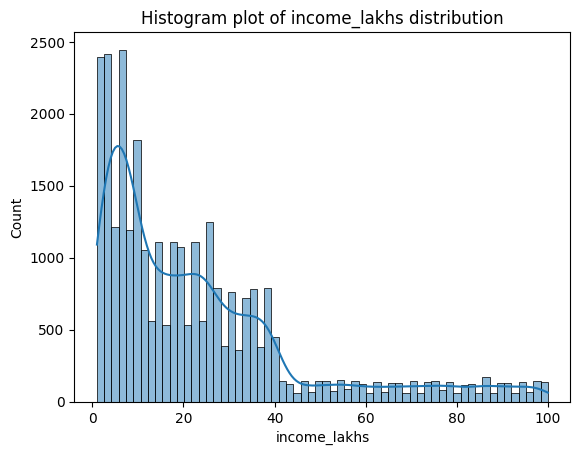

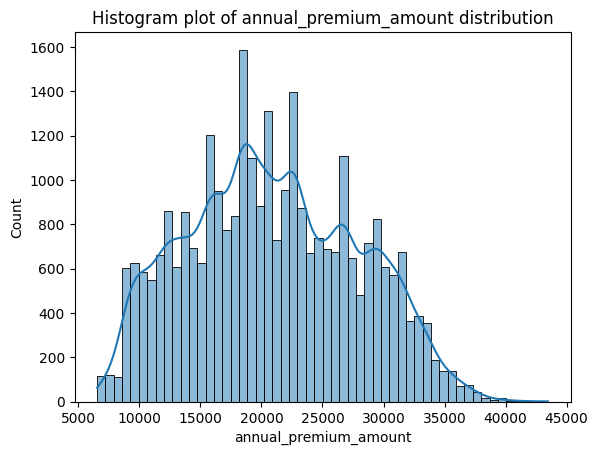

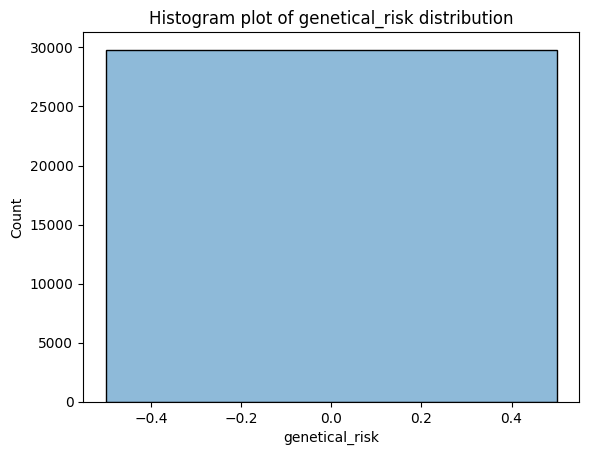

In [29]:
for col in numeric_columns:
    sns.histplot(df2[col], kde=True)
    plt.title(f"Histogram plot of {col} distribution")  # Closing parenthesis added
    plt.show()


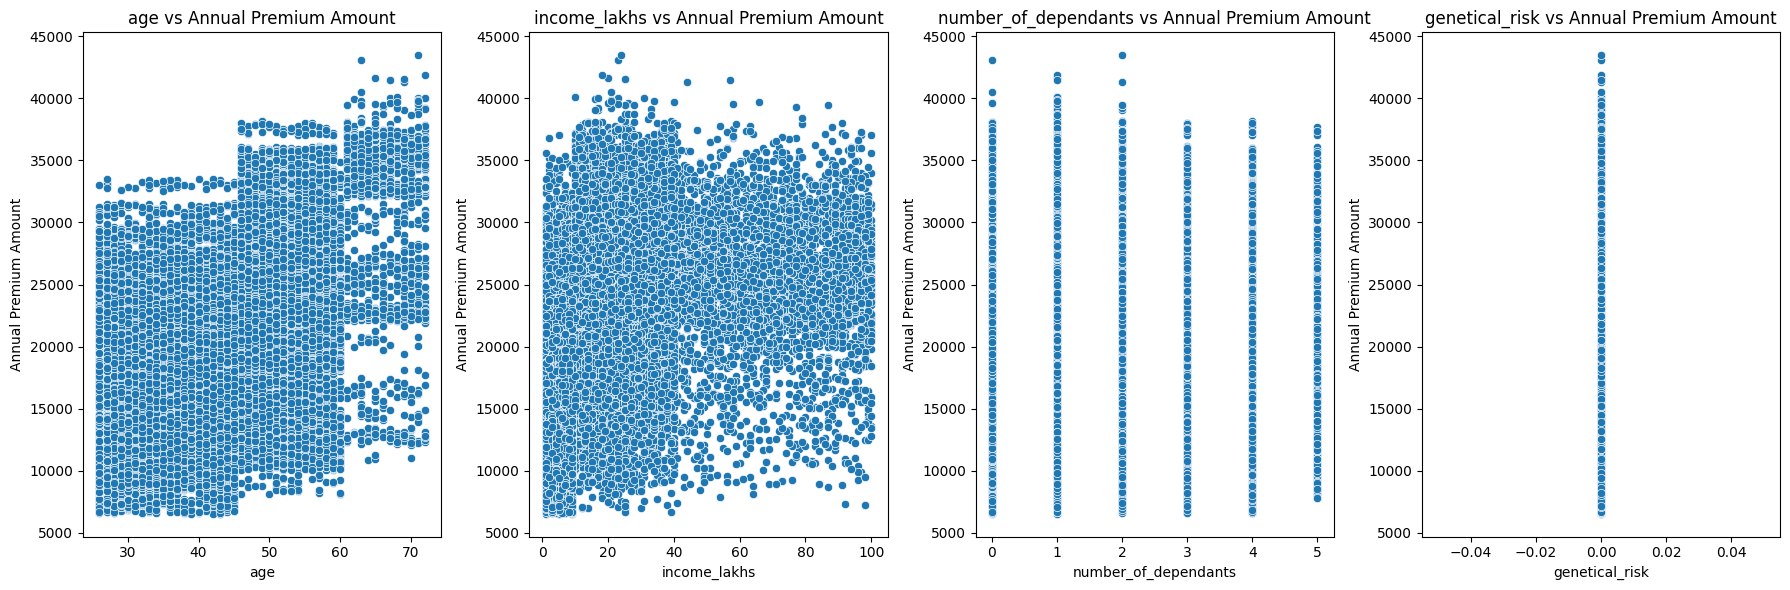

In [30]:
numeric_features =['age','income_lakhs','number_of_dependants','genetical_risk']

fig , axes = plt.subplots(1,len(numeric_features),figsize=(18,6))

for ax,column in zip(axes,numeric_features):
    sns.scatterplot(x=df2[column] ,y=df2['annual_premium_amount'],ax=ax)
    ax.set_title(f'{column} vs Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()
plt.show()


### Checking unique values of each columns

In [31]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

In [32]:
categorical_cols=['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount']
for col in categorical_cols:
    print(col,":",df2[col].unique())

age : [26 29 49 30 56 33 43 59 46 68 60 27 36 28 32 55 35 52 40 50 41 67 37 34
 54 42 45 44 57 38 31 58 48 51 47 39 53 66 64 65 62 61 70 72 69 71 63]
gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
number_of_dependants : [0 2 3 4 1 5]
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
income_lakhs : [  6  20  77  14   4  46  21   1  27  18   7  37  13  83  15  19  29  11
   8  23   3  40  84  22   9  71  59  97  30  35  28  57   5  25  12  92
   2  36  24  34  93  78  68  62  31  50  32  26  10  54  86  41  95  85
  81  79  56  80  16  17  33  39  89  82 100  70  88  66  53  75  94  69
  58  90  74  65  91  99  38  52  87  96  44  67  43  63  98  64  49  73
  61  55  45  42  60  47  

We will do some changes in smoking_status values

In [33]:
df2['smoking_status'] = df2['smoking_status'].replace({
    'Smoking=0': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Not Smoking': 'No Smoking'
})


# Check the unique values in the smoking_status column
print(df2['smoking_status'].unique())

['No Smoking' 'Regular' 'Occasional']


In [34]:
pct_count= df2['gender'].value_counts(normalize=True)
pct_count

gender
Male      0.549125
Female    0.450875
Name: proportion, dtype: float64

In [35]:
pct_count.index

Index(['Male', 'Female'], dtype='object', name='gender')

In [36]:
pct_count.values

array([0.54912481, 0.45087519])

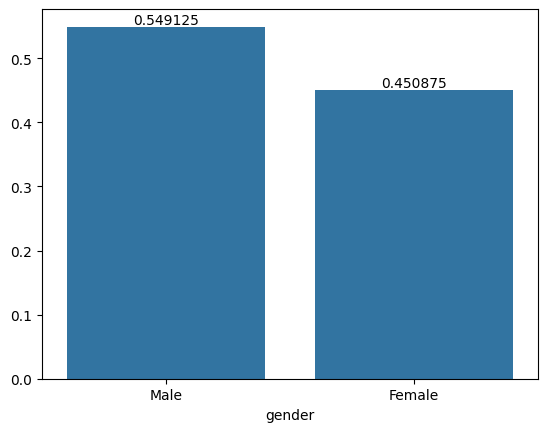

In [37]:
a =sns.barplot(y=pct_count.values,x=pct_count.index)
for i in a.containers:
    a.bar_label(i)
plt.show()

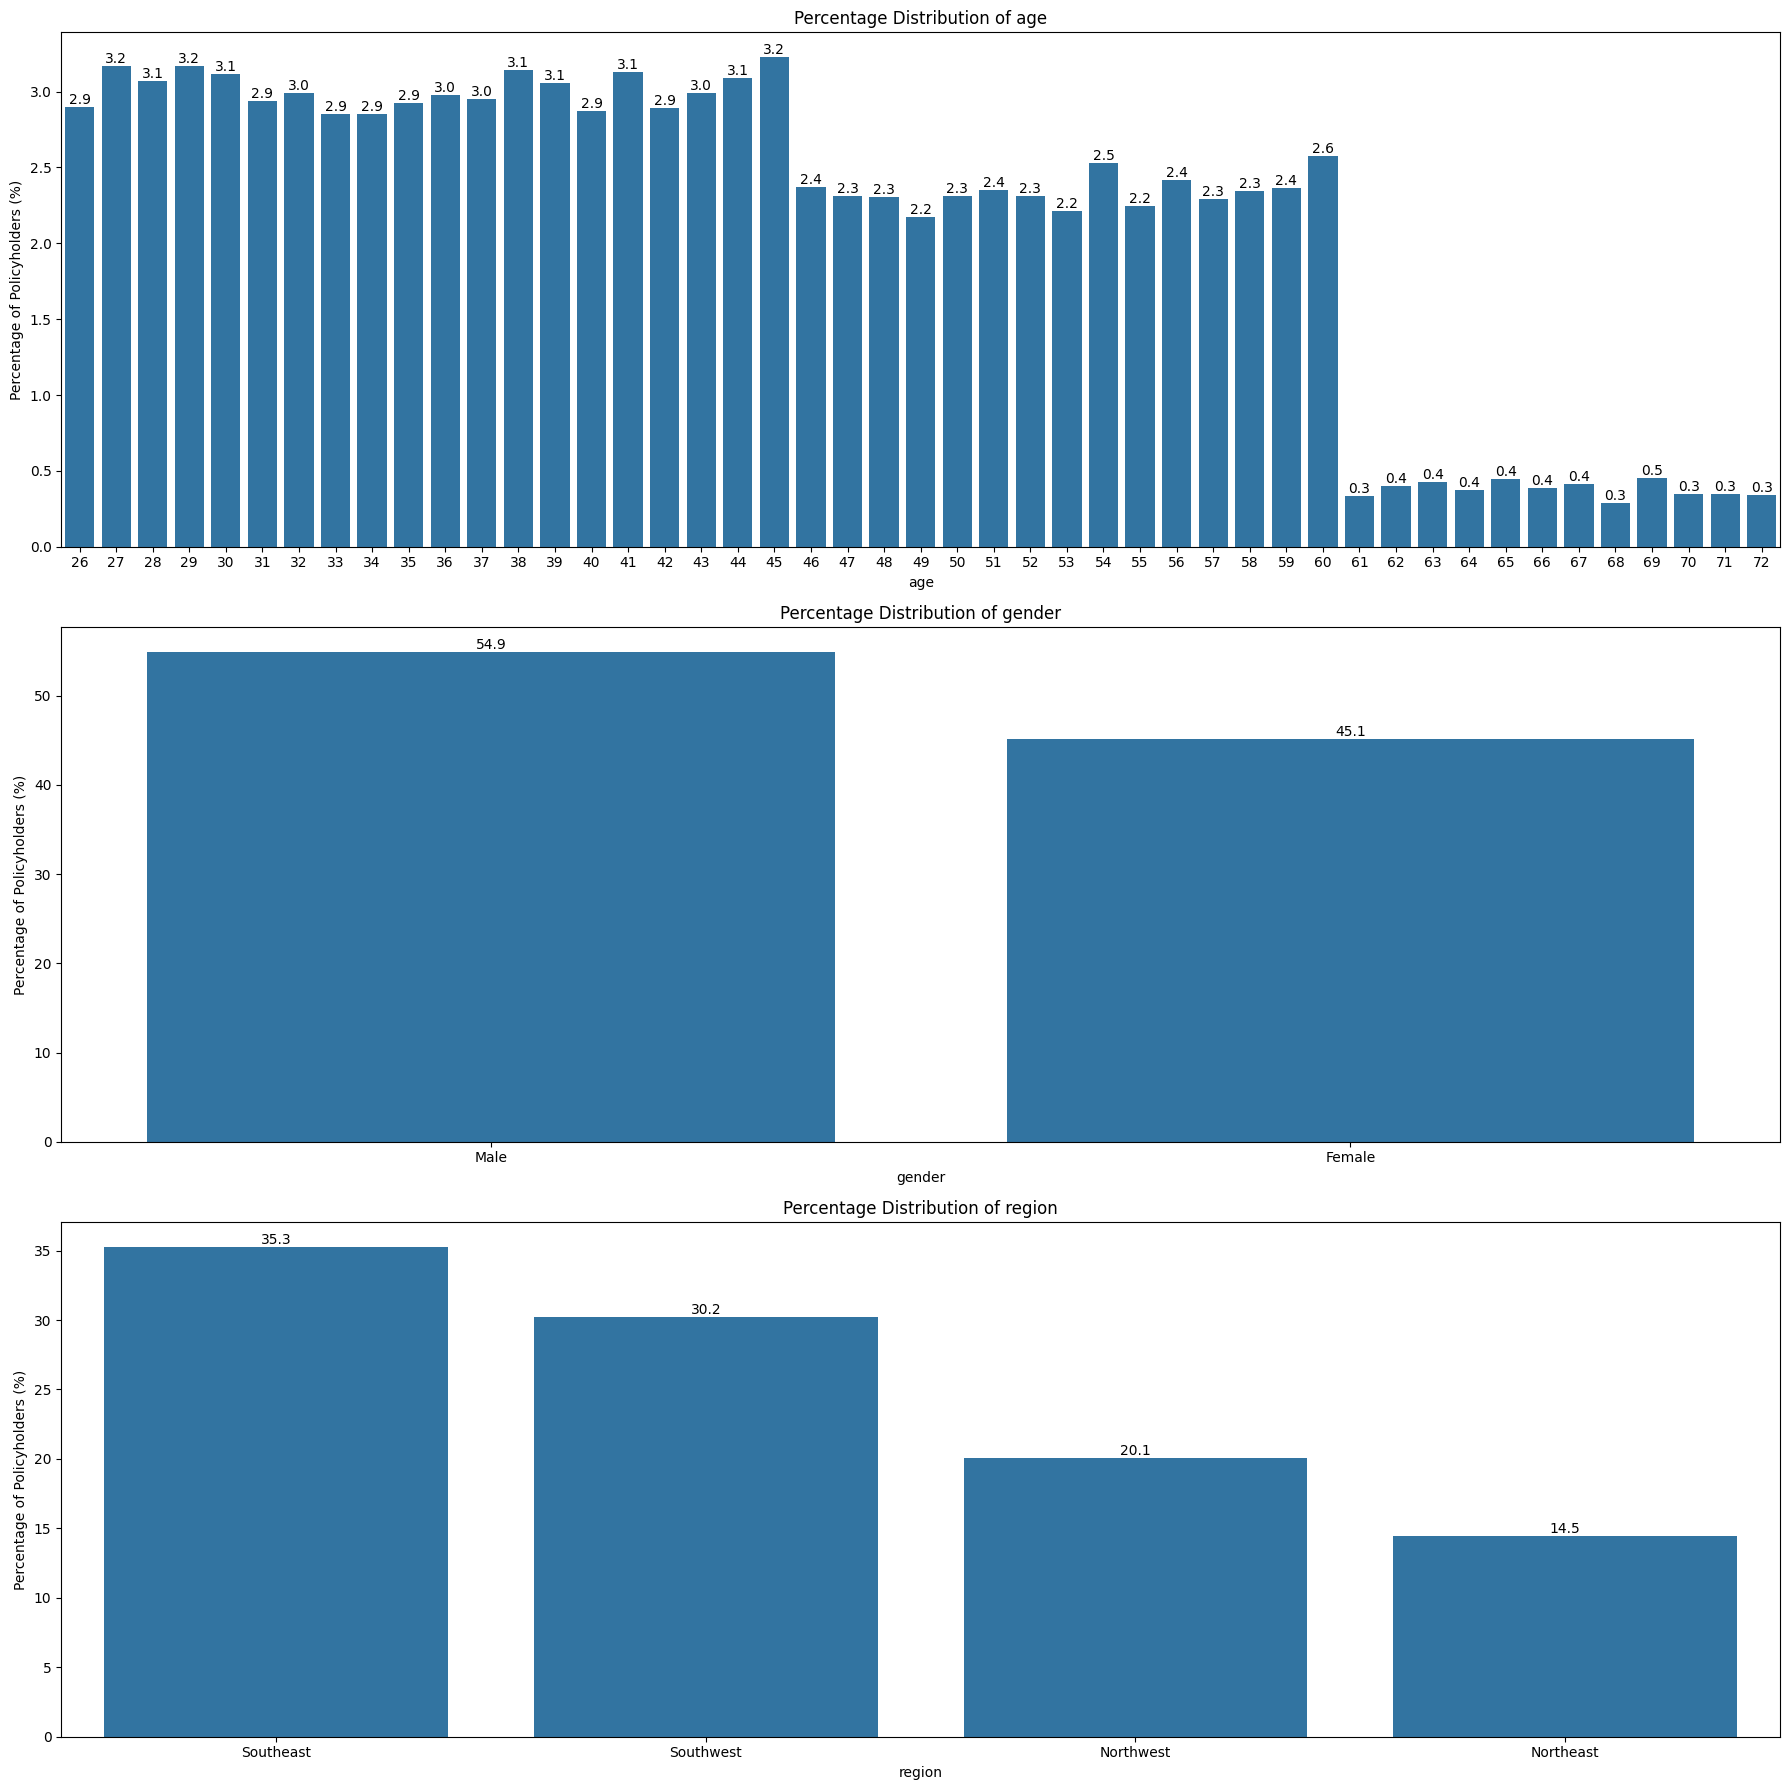

In [38]:
fig, axes = plt.subplots(3, 1, figsize=(18, 18))
axes = axes.flatten()

for ax, column in zip(axes, categorical_cols):
    category_counts = df2[column].value_counts(normalize=True) * 100  # Corrected method name
    a = sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)

    # Add labels to each bar
    for container in a.containers:
        a.bar_label(container, fmt='%.1f')  # Display values as percentages with one decimal place

    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Percentage of Policyholders (%)')

plt.tight_layout()
plt.show()


In [39]:
crosstab = pd.crosstab(df2['income_level'],df2['insurance_plan'])
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,799,3554,4354
25L - 40L,301,2631,3142
<10L,6054,527,4341
> 40L,214,3287,618


In [40]:
#Alternate Method
pivot_table = df2.pivot_table(
    index='income_level',   # Rows (similar to the crosstab index)
    columns='insurance_plan',  # Columns (similar to the crosstab columns)
    aggfunc='size',         # Equivalent to counting occurrences
    fill_value=0            # Replace NaNs with 0
)

pivot_table


insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,799,3554,4354
25L - 40L,301,2631,3142
<10L,6054,527,4341
> 40L,214,3287,618


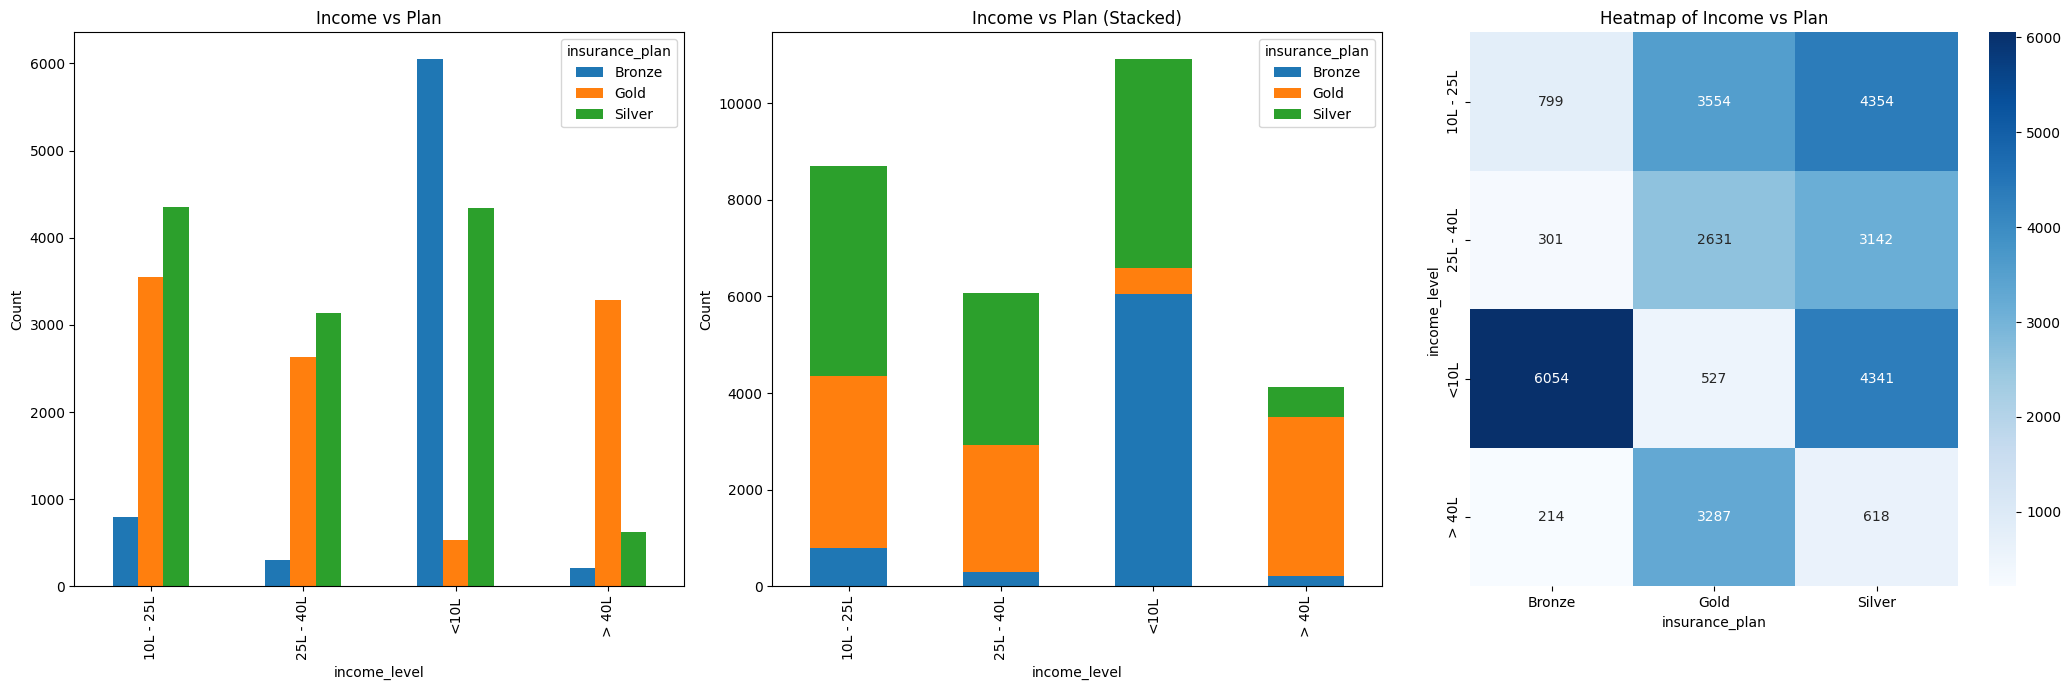

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 1 row and 3 columns for subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 7))  # Adjust size to fit three subplots

# First subplot: regular bar plot
crosstab.plot(kind='bar', ax=axes[0])  # Use ax=axes[0] to ensure plot is placed in the first subplot
axes[0].set_title('Income vs Plan')
axes[0].set_ylabel('Count')

# Second subplot: stacked bar plot
crosstab.plot(kind='bar', stacked=True, ax=axes[1])  # Use ax=axes[1] for second subplot
axes[1].set_title('Income vs Plan (Stacked)')
axes[1].set_ylabel('Count')

# Third subplot: heatmap
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues', ax=axes[2])  # Use ax=axes[2] for the heatmap
axes[2].set_title('Heatmap of Income vs Plan')

# Adjust layout so subplots don't overlap
plt.tight_layout()

# Show the figure
plt.show()


### Featurer Engineering

In [42]:
df2.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [43]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [44]:
risk_scores={
    "diabetes":6,
    "heart disease":8,
    "high blood pressure":6,
    "thyroid":5,
    "no disease":0,
    "none":0
}
    

In [45]:
df2[['disease1','disease2']]=df2['medical_history'].str.split(" & ",expand=True).apply(lambda x: x.str.lower())
df2

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,None
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,None
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0,no disease,None
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0,diabetes,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,60,Female,Northwest,Married,3,Normal,No Smoking,Self-Employed,25L - 40L,26,High blood pressure,Gold,26370,0,high blood pressure,None
29900,40,Female,Southeast,Unmarried,0,Overweight,Regular,Salaried,10L - 25L,16,Diabetes & Thyroid,Gold,29496,0,diabetes,thyroid
29901,37,Female,Northwest,Unmarried,0,Obesity,No Smoking,Salaried,<10L,4,No Disease,Bronze,10957,0,no disease,None
29902,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076,0,thyroid,None


In [46]:
df2.isna().sum()

age                          0
gender                       0
region                       0
marital_status               0
number_of_dependants         0
bmi_category                 0
smoking_status               0
employment_status            0
income_level                 0
income_lakhs                 0
medical_history              0
insurance_plan               0
annual_premium_amount        0
genetical_risk               0
disease1                     0
disease2                 26058
dtype: int64

To fill 'None' values in disease1 and disease2 columns.

In [47]:
# Use .loc to modify the columns directly without chaining
df2.loc[:, 'disease1'] = df2['disease1'].fillna('none')
df2.loc[:, 'disease2'] = df2['disease2'].fillna('none')

# Initialize the total_risk_score column to 0
df2.loc[:, 'total_risk_score'] = 0


In [48]:
df2

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,none,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0,no disease,none,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0,diabetes,none,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,60,Female,Northwest,Married,3,Normal,No Smoking,Self-Employed,25L - 40L,26,High blood pressure,Gold,26370,0,high blood pressure,none,0
29900,40,Female,Southeast,Unmarried,0,Overweight,Regular,Salaried,10L - 25L,16,Diabetes & Thyroid,Gold,29496,0,diabetes,thyroid,0
29901,37,Female,Northwest,Unmarried,0,Obesity,No Smoking,Salaried,<10L,4,No Disease,Bronze,10957,0,no disease,none,0
29902,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076,0,thyroid,none,0


In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29822 entries, 0 to 29903
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    29822 non-null  int64 
 1   gender                 29822 non-null  object
 2   region                 29822 non-null  object
 3   marital_status         29822 non-null  object
 4   number_of_dependants   29822 non-null  int64 
 5   bmi_category           29822 non-null  object
 6   smoking_status         29822 non-null  object
 7   employment_status      29822 non-null  object
 8   income_level           29822 non-null  object
 9   income_lakhs           29822 non-null  int64 
 10  medical_history        29822 non-null  object
 11  insurance_plan         29822 non-null  object
 12  annual_premium_amount  29822 non-null  int64 
 13  genetical_risk         29822 non-null  int64 
 14  disease1               29822 non-null  object
 15  disease2               2

In [50]:
df2.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
disease1                 0
disease2                 0
total_risk_score         0
dtype: int64

Mapping Risk Score 

In [51]:
for disease in ['disease1','disease2']:
    df2['total_risk_score']+=df2[disease].map(risk_scores)

In [52]:
df2.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
disease1                 0
disease2                 0
total_risk_score         0
dtype: int64

Adding Normalized_risk_score column

In [53]:
max_score=df2['total_risk_score'].max()
min_score=df2['total_risk_score'].min()
df2['normalized_risk_score']=(df2['total_risk_score']-min_score)/(max_score-min_score)
df2

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0,diabetes,none,6,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,60,Female,Northwest,Married,3,Normal,No Smoking,Self-Employed,25L - 40L,26,High blood pressure,Gold,26370,0,high blood pressure,none,6,0.428571
29900,40,Female,Southeast,Unmarried,0,Overweight,Regular,Salaried,10L - 25L,16,Diabetes & Thyroid,Gold,29496,0,diabetes,thyroid,11,0.785714
29901,37,Female,Northwest,Unmarried,0,Obesity,No Smoking,Salaried,<10L,4,No Disease,Bronze,10957,0,no disease,none,0,0.000000
29902,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076,0,thyroid,none,5,0.357143


In [54]:
df2.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
disease1                 0
disease2                 0
total_risk_score         0
normalized_risk_score    0
dtype: int64

Mapping for insurance_plan with scores

In [55]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [56]:
df2['insurance_plan']=df2['insurance_plan'].map({'Bronze':1,'Silver':2,'Gold':3})
df2.insurance_plan.unique()

array([1, 2, 3], dtype=int64)

In [57]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,1,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,1,16339,0,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,2,18164,0,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,3,20303,0,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,1,15610,0,diabetes,none,6,0.428571


Mapping values for income_level

In [58]:
df2['income_level'].unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [59]:
df2['income_level']=df2['income_level'].map({'<10L':1,'10L - 25L':2,'25L - 40L':3,'> 40L':4})

In [60]:
df2.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
disease1                 0
disease2                 0
total_risk_score         0
normalized_risk_score    0
dtype: int64

To perform One Hot Encoding

In [61]:
nominal_cols=['gender','region','marital_status','bmi_category','smoking_status','employment_status']
df3=pd.get_dummies(df2,columns=nominal_cols,drop_first=True,dtype=int)

In [62]:
df3

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,0,diabetes,none,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,0,diabetes,none,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,0,high blood pressure,none,...,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,No Disease,3,20303,0,no disease,none,...,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,Diabetes,1,15610,0,diabetes,none,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,60,3,3,26,High blood pressure,3,26370,0,high blood pressure,none,...,0,0,0,0,0,0,0,0,0,1
29900,40,0,2,16,Diabetes & Thyroid,3,29496,0,diabetes,thyroid,...,1,0,1,0,1,0,0,1,1,0
29901,37,0,1,4,No Disease,1,10957,0,no disease,none,...,0,0,1,1,0,0,0,0,1,0
29902,47,2,4,82,Thyroid,3,27076,0,thyroid,none,...,1,0,0,0,0,0,0,0,1,0


In [63]:
df4=df3.drop(['medical_history','disease1','disease2','total_risk_score'],axis=1)

In [64]:
df4

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,1,15610,0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,60,3,3,26,3,26370,0,0.428571,0,1,0,0,0,0,0,0,0,0,0,1
29900,40,0,2,16,3,29496,0,0.785714,0,0,1,0,1,0,1,0,0,1,1,0
29901,37,0,1,4,1,10957,0,0.000000,0,1,0,0,1,1,0,0,0,0,1,0
29902,47,2,4,82,3,27076,0,0.357143,0,0,1,0,0,0,0,0,0,0,1,0


Correlation analysis using heatmap

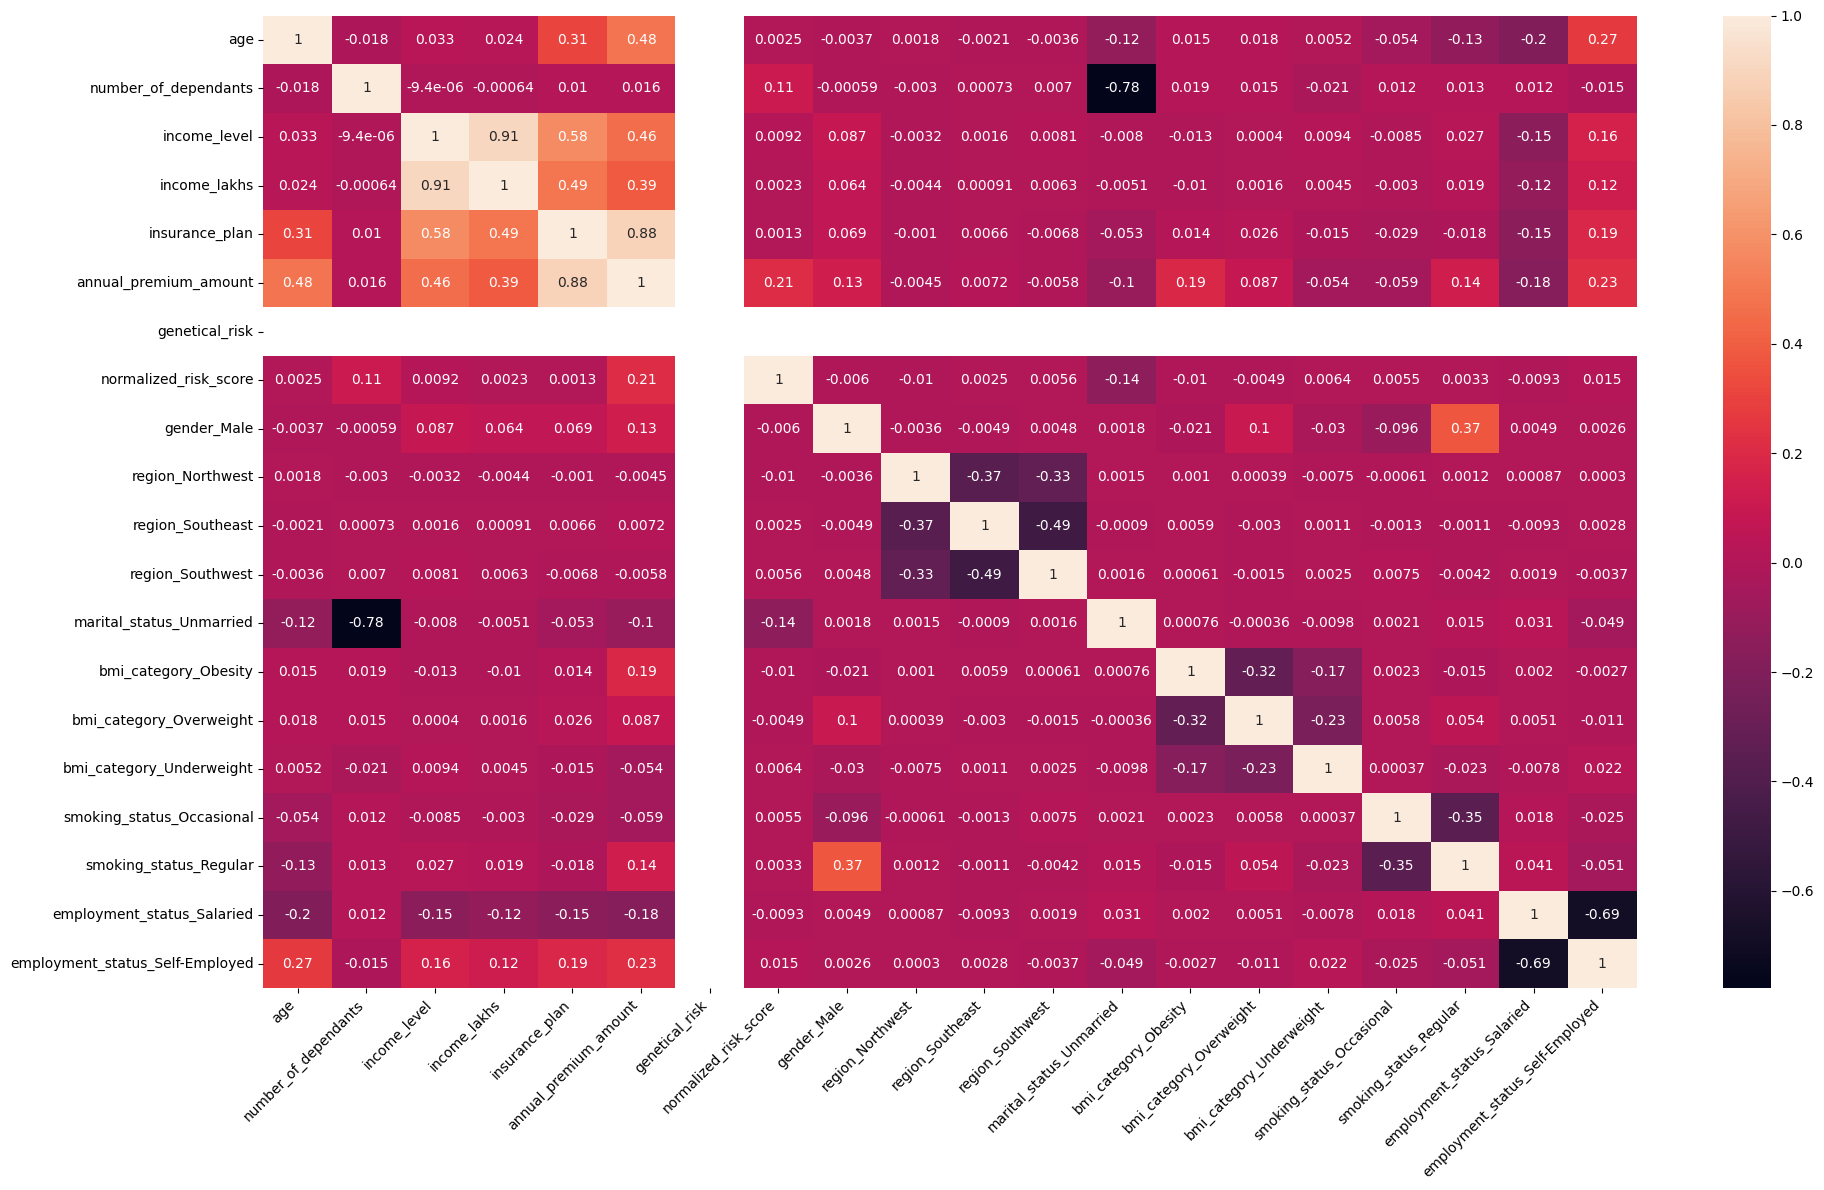

In [65]:
cm = df4.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)

# Corrected xticks and yticks
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Corrected tight_layout
plt.tight_layout()

plt.show()


Scaling the values 

In [66]:
X=df4.drop('annual_premium_amount',axis='columns')
y=df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

# Define columns to scale
cols_to_scale = ['age', 'number_of_dependants', 'income_level', 'income_lakhs', 'insurance_plan','genetical_risk']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the specified columns
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

# Now 'X' will have the scaled values for the selected columns


In [67]:
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.000000,0.050505,0.0,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.000000,0.050505,0.0,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.333333,0.191919,0.5,0.0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,1.000000,0.767677,1.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.333333,0.131313,0.0,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [68]:
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.0,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,0.371628,0.477547,0.371225,0.224509,0.544112,0.0,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,0.240053,0.284129,0.351111,0.226822,0.379009,0.0,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.060606,0.500000,0.0,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.333333,0.161616,0.500000,0.0,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.313131,1.000000,0.0,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Calculating the VIF 

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df=pd.DataFrame()
    vif_df['column']=data.columns
    vif_df['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [70]:
calculate_vif(X)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,column,VIF
0,age,3.921783
1,number_of_dependants,6.278938
2,income_level,13.890522
3,income_lakhs,11.185596
4,insurance_plan,5.271297
5,genetical_risk,NaN
6,normalized_risk_score,3.810619
7,gender_Male,2.599098
8,region_Northwest,2.123965
9,region_Southeast,2.980842


We will drop 'income_level	' since VIF>10 and comparitively it has highest VIF value.

In [71]:
calculate_vif(X.drop('income_level',axis='columns'))

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,column,VIF
0,age,3.863055
1,number_of_dependants,6.278147
2,income_lakhs,2.678102
3,insurance_plan,4.574625
4,genetical_risk,NaN
5,normalized_risk_score,3.808345
6,gender_Male,2.591439
7,region_Northwest,2.123277
8,region_Southeast,2.979899
9,region_Southwest,2.708641


In [72]:
X_reduced=X.drop('income_level',axis='columns')
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.050505,0.0,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.050505,0.0,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.191919,0.5,0.0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,0.767677,1.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.131313,0.0,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


### Model Training : Fine Tuning

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X_reduced,y,test_size=0.3,random_state=10)

In [74]:
print("X train:",X_train.shape)
print("X test:",X_test.shape)
print("y train:",y_train.shape)
print("y test:",y_test.shape)



X train: (20875, 18)
X test: (8947, 18)
y train: (20875,)
y test: (8947,)


In [75]:
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
train_score=model_lr.score(X_train,y_train)
test_score=model_lr.score(X_test,y_test)
train_score,test_score

(0.9534163989489616, 0.9538448451629948)

In [76]:
model_lr.intercept_

5935.981289344609

In [77]:
model_lr.coef_

array([ 7016.23932829, -1311.76470171,  -708.19336921, 14835.98820801,
           0.        ,  6053.6241234 ,    37.55826883,   -55.25087215,
         -19.62254288,   -22.28967559,  -700.32019985,  3926.8127061 ,
        1979.45604663,   612.86623617,   837.3951011 ,  2800.66184334,
         -45.49136706,   243.07842087])

In [78]:
feature_importances=model_lr.coef_

In [79]:
coef_df=pd.DataFrame(feature_importances,index=X_test.columns,columns=['Coefficients'])

In [80]:
coef_df=coef_df.sort_values(by='Coefficients',ascending=True)
coef_df

,Coefficients
number_of_dependants,-1311.764702
income_lakhs,-708.193369
marital_status_Unmarried,-700.320200
region_Northwest,-55.250872
employment_status_Salaried,-45.491367
region_Southwest,-22.289676
region_Southeast,-19.622543
genetical_risk,0.000000
gender_Male,37.558269
employment_status_Self-Employed,243.078421


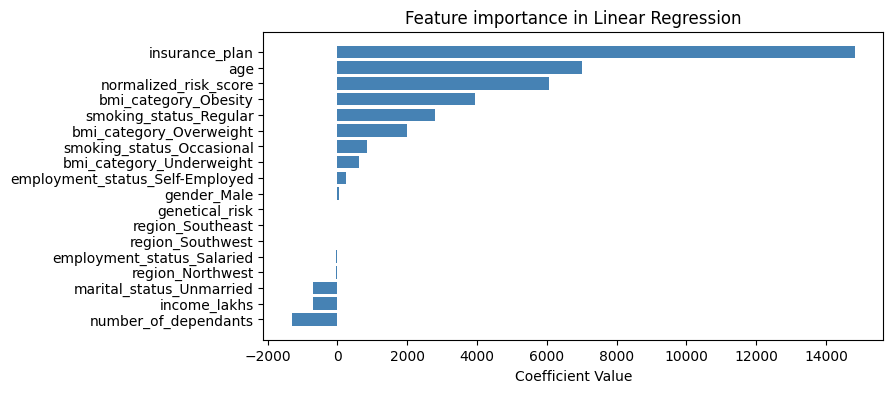

In [81]:
plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['Coefficients'],color='Steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature importance in Linear Regression')
plt.show()

To improve the model we now use ridge

In [82]:
model_rg=Ridge(alpha=10)
model_rg.fit(X_train,y_train)
train_score=model_rg.score(X_train,y_train)
test_score=model_rg.score(X_test,y_test)
train_score,test_score

(0.9534000354275609, 0.9538387998701963)

To improve the score now we use xgbooster

In [83]:
from xgboost import XGBRegressor  # Correct import

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
train_score = model_xgb.score(X_train, y_train)
test_score = model_xgb.score(X_test, y_test)

train_score, test_score


(0.9986370801925659, 0.9979538321495056)

In [84]:
y_pred=model_xgb.predict(X_test)

mse_lr=mean_squared_error(y_test,y_pred)
rmse_lr=np.sqrt(mse_lr)
print("XGBoost Regression ==> MSE:",mse_lr,"RMSE:",rmse_lr)

XGBoost Regression ==> MSE: 96814.21540071907 RMSE: 311.14982789762087


In [85]:
y_pred=model_lr.predict(X_test)

mse_lr=mean_squared_error(y_test,y_pred)
rmse_lr=np.sqrt(mse_lr)
print("Linear Regression ==> MSE:",mse_lr,"RMSE:",rmse_lr)

Linear Regression ==> MSE: 2183844.360312456 RMSE: 1477.7835972538253


In [86]:
model_xgb=XGBRegressor()
param_grid={
    'n_estimators':[20,40,50],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,4,5]
}
random_search=RandomizedSearchCV(model_xgb,param_grid,n_iter=10,cv=3,scoring='r2',random_state=42)
random_search.fit(X_train,y_train)
random_search.best_score_

0.9970577955245972

In [87]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [88]:
best_model=random_search.best_estimator_
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [89]:
feature_importances=best_model.feature_importances_
feature_importances

array([2.9575411e-02, 3.5216028e-06, 1.0522631e-05, 8.9835811e-01,
       0.0000000e+00, 1.8415341e-02, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.8601198e-02,
       1.1638871e-02, 1.8890719e-03, 4.0735020e-03, 1.7418258e-02,
       1.6214110e-05, 0.0000000e+00], dtype=float32)

In [90]:
coef_df=pd.DataFrame(feature_importances,index=X_test.columns,columns=['Coefficients'])

In [91]:
coef_df=coef_df.sort_values(by='Coefficients',ascending=True)
coef_df

,Coefficients
region_Southeast,0.000000
marital_status_Unmarried,0.000000
region_Southwest,0.000000
region_Northwest,0.000000
gender_Male,0.000000
employment_status_Self-Employed,0.000000
genetical_risk,0.000000
number_of_dependants,0.000004
income_lakhs,0.000011
employment_status_Salaried,0.000016


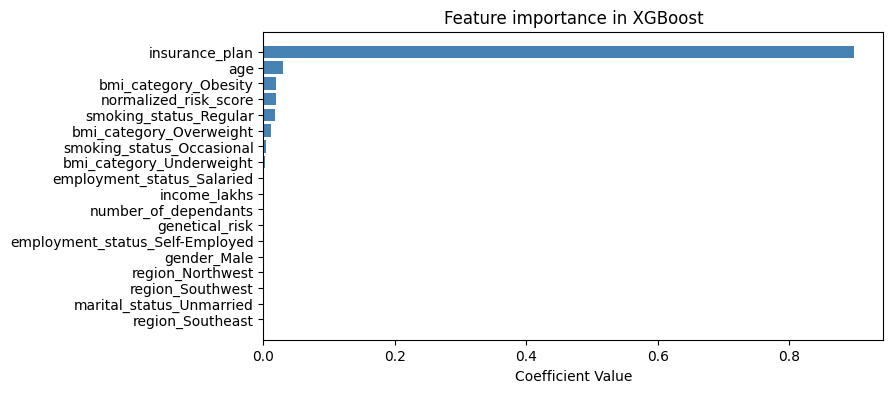

In [92]:
plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['Coefficients'],color='Steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature importance in XGBoost')
plt.show()

### Error Analysis

In [93]:
y_pred=best_model.predict(X_test)

residuals=y_pred-y_test
residuals_pct=residuals*100/y_test

results_df=pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred,
    'diff':residuals,
    'diff_pct':residuals_pct
})
results_df.head()

,actual,predicted,diff,diff_pct
19713,26895,26691.470703,-203.529297,-0.756755
14750,22734,22650.751953,-83.248047,-0.366183
19932,21198,21581.894531,383.894531,1.810994
29643,9100,9425.934570,325.934570,3.581699
17076,26434,26691.470703,257.470703,0.974013


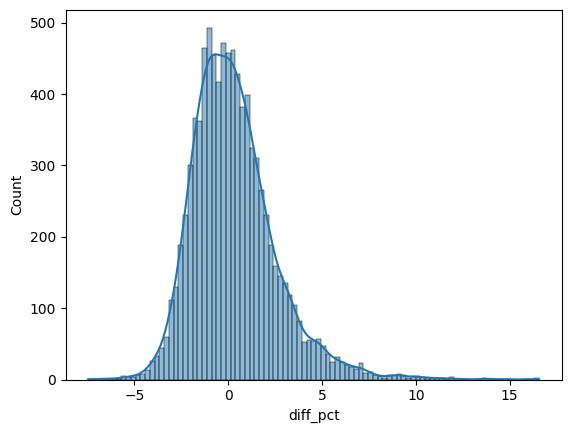

In [94]:
sns.histplot(results_df['diff_pct'],kde=True)
plt.show()

In [95]:
extreme_error_threshold=10

In [96]:
extreme_results_df=results_df[np.abs(results_df.diff_pct)>extreme_error_threshold]
extreme_results_df

,actual,predicted,diff,diff_pct
14286,6845,7621.263672,776.263672,11.340594
27518,8502,9425.934570,923.934570,10.867261
9285,6872,7621.263672,749.263672,10.903138
7547,6538,7621.263672,1083.263672,16.568732
21910,6651,7621.263672,970.263672,14.588237
12189,6571,7621.263672,1050.263672,15.983316
21141,10722,11841.492188,1119.492188,10.441076
16263,8206,9063.517578,857.517578,10.449885
8216,6635,7621.263672,986.263672,14.864562
13973,10583,11841.492188,1258.492188,11.891639


In [97]:
results_df.shape

(8947, 4)

In [98]:
extreme_results_df.shape[0]*100/results_df.shape[0]

0.32413099362914943

In [99]:
results_df[np.abs(results_df.diff_pct)>50].sort_values('diff_pct',ascending=False)

,actual,predicted,diff,diff_pct


In [100]:
X_test.index

Index([19713, 14750, 19932, 29643, 17076, 20314, 24893, 26722, 25844, 10731,
       ...
       10637,  1224, 17046, 19228,  9275,  3387,  7858,  9744,  4849,  8986],
      dtype='int64', length=8947)

In [101]:
extreme_results_df.index

Index([14286, 27518,  9285,  7547, 21910, 12189, 21141, 16263,  8216, 13973,
        9150, 24145, 18522,  6163, 18681, 19145, 21455, 22666,  7508, 10741,
        6517, 18834, 13744, 24119,  2695, 25658, 11019, 14037,  7654],
      dtype='int64')

In [102]:
extreme_error_df=X_test.loc[extreme_results_df.index]
extreme_error_df

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
14286,0.021739,0.6,0.050505,0.0,0.0,0.000000,1,1,0,0,1,0,0,0,0,0,1,0
27518,0.304348,0.6,0.080808,0.0,0.0,0.357143,1,1,0,0,0,0,0,0,0,0,0,1
9285,0.326087,0.6,0.010101,0.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
7547,0.347826,0.2,0.080808,0.0,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,1,0
21910,0.043478,0.6,0.020202,0.0,0.0,0.000000,1,0,1,0,0,0,0,0,0,0,0,0
12189,0.043478,0.6,0.060606,0.0,0.0,0.000000,1,0,0,1,0,0,0,0,0,0,1,0
21141,0.239130,0.6,0.000000,0.0,0.0,0.857143,0,0,0,1,0,0,0,0,0,0,0,1
16263,0.673913,0.6,0.383838,0.0,0.0,0.000000,1,1,0,0,0,0,0,0,0,0,0,0
8216,0.152174,0.4,0.010101,0.0,0.0,0.000000,0,0,0,0,0,0,0,0,0,0,1,0
13973,0.152174,0.8,0.030303,0.0,0.0,0.857143,0,1,0,0,0,0,0,0,0,0,0,1


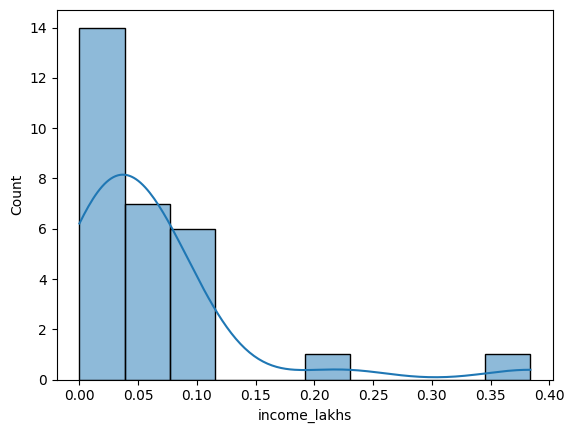

In [103]:
sns.histplot(extreme_error_df.income_lakhs,kde=True)
plt.show()

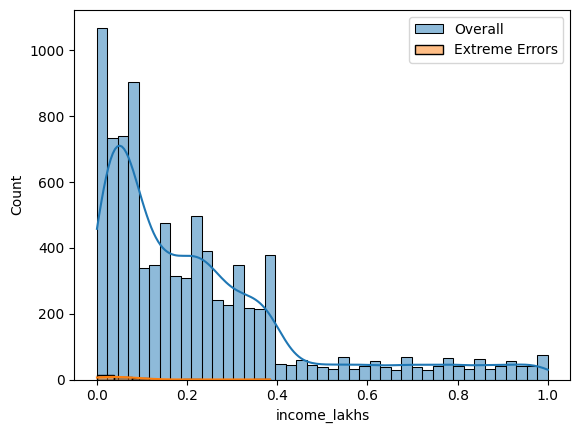

In [104]:
sns.histplot(X_test.income_lakhs,label="Overall",kde=True)
sns.histplot(extreme_error_df.income_lakhs,label="Extreme Errors",kde=True)
plt.legend()
plt.show()

We will now perform it for rest of the columns

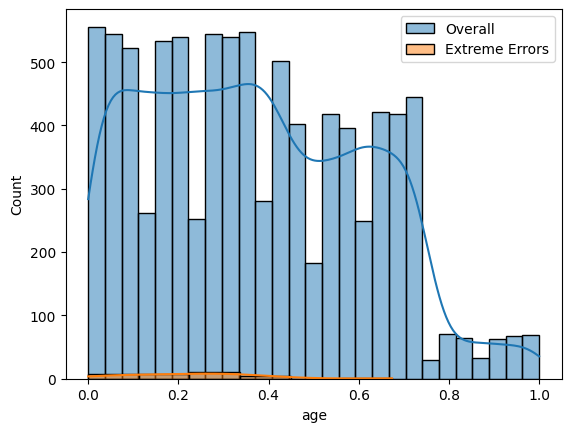

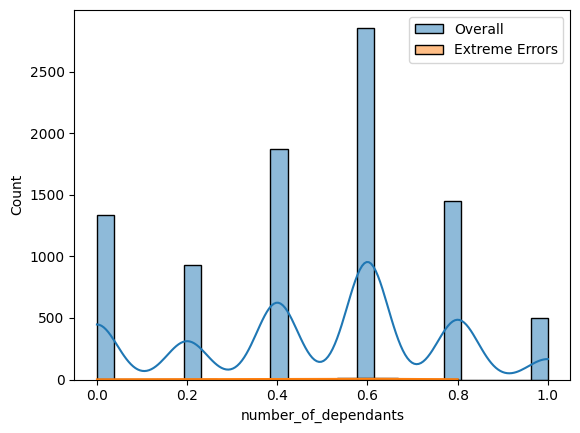

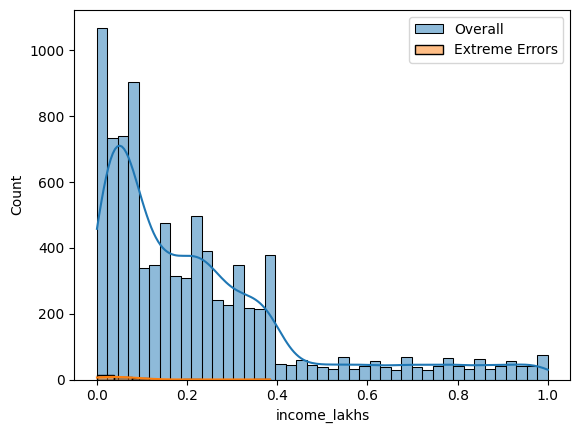

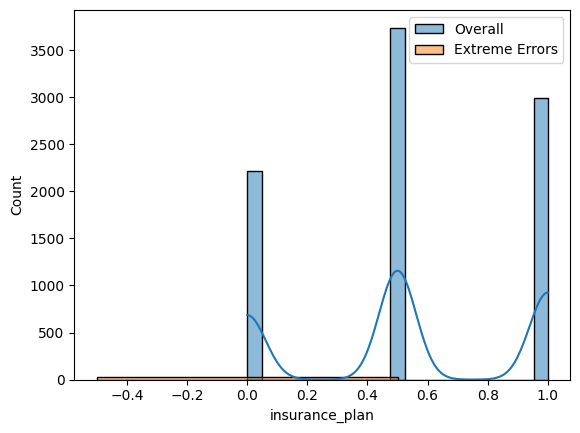

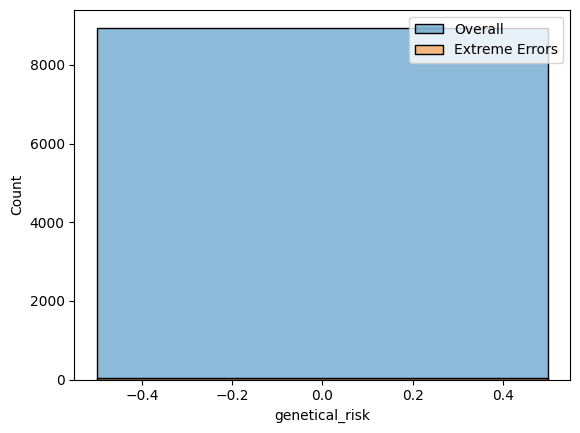

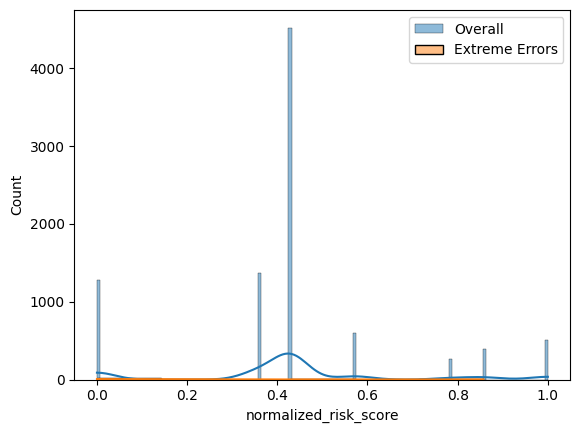

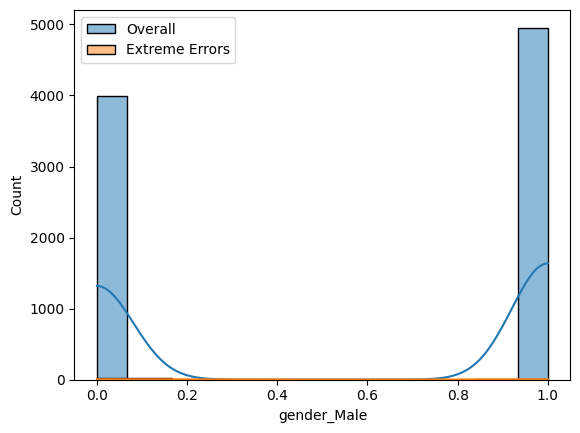

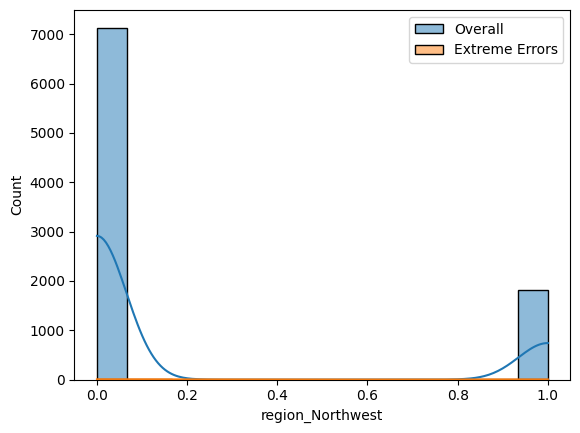

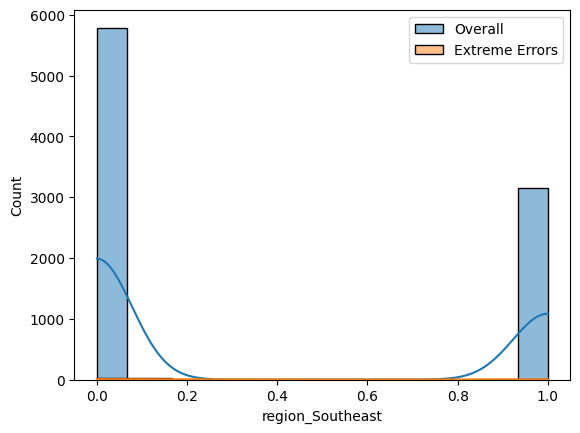

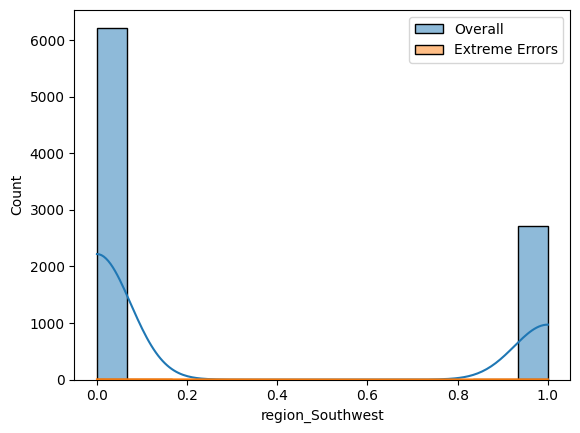

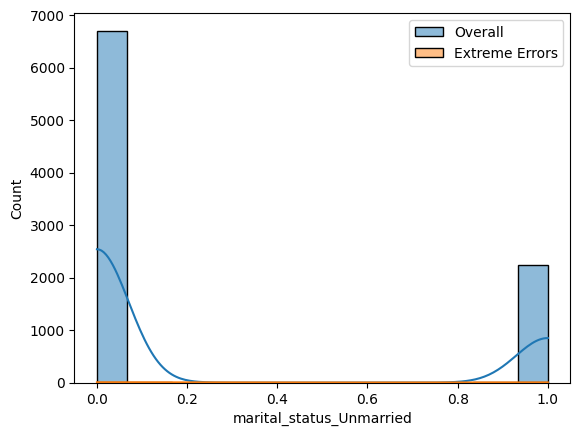

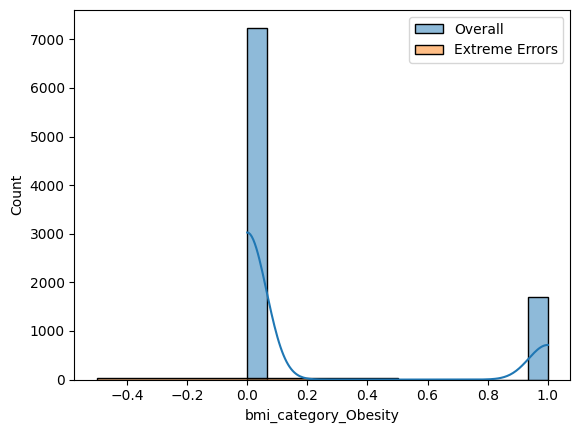

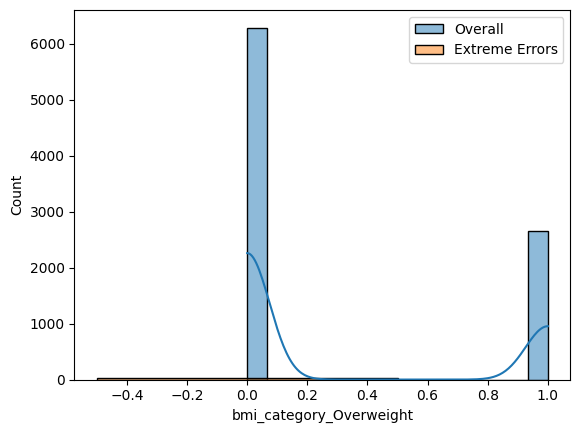

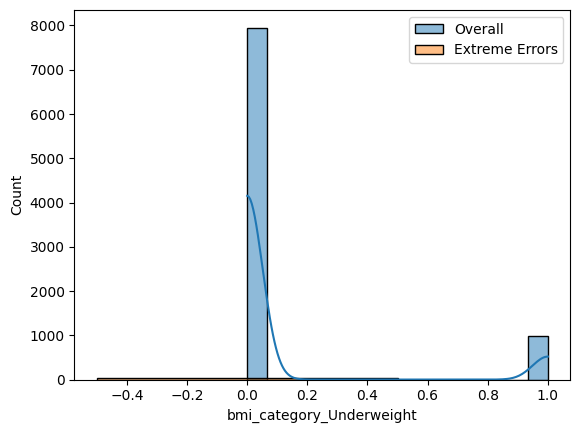

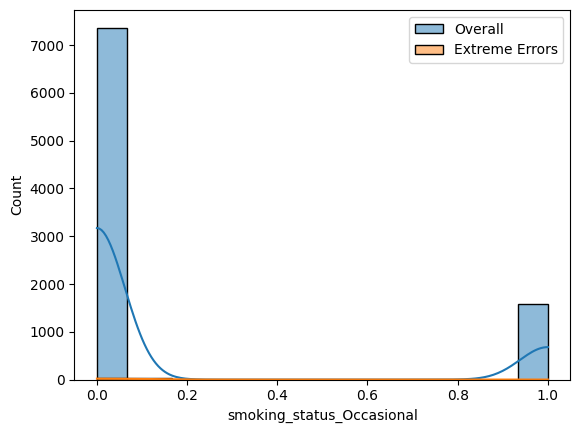

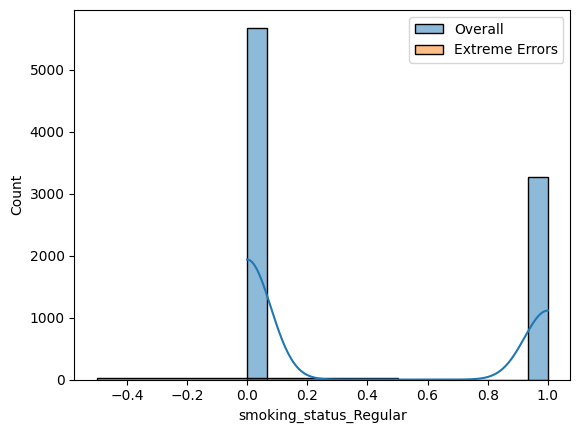

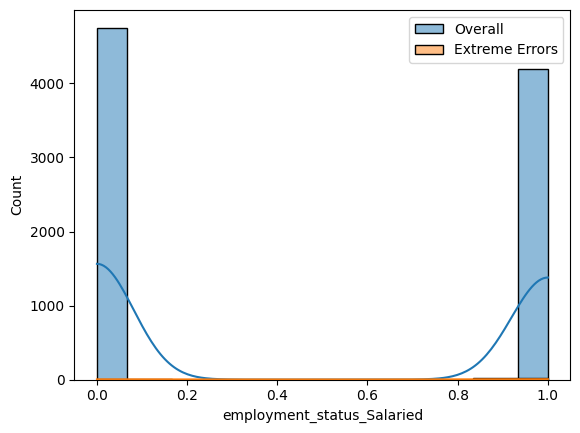

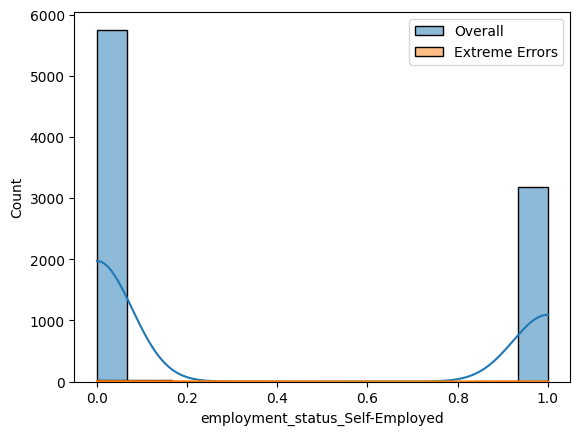

In [105]:
for feature in X_test.columns:  # Loop over columns in X_test, not X
    sns.histplot(X_test[feature], label="Overall", alpha=0.5, kde=True)  # Correct X_test usage
    sns.histplot(extreme_error_df[feature], label="Extreme Errors", kde=True)
    
    # Add a legend and show the plot
    plt.legend()
    plt.show()


In [106]:
cols_to_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan',
 'genetical_risk']

In [107]:
from joblib import dump

dump(best_model, "artifacts/model_rest.joblib")

scaler_with_cols={
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}

dump(scaler_with_cols, "artifacts/scaler_rest.joblib")

['artifacts/scaler_rest.joblib']